# 0-2 수업 내용
- 0-2 수업 주제는 "AI를 위한 Math" 보다는 **머신러닝 기초** 라고 생각하면 더 맞습니다.
- 업스테이지 실습/과제 교안에서는 아래와 같은 네 가지 내용을 다룹니다.
  - 데이터 정규화
  - **선형 회귀 (Linear Regression)**
  - **로지스틱 회귀 (Logistic Regression)**
  - 아담 옵티마이저

<br/>

- 이 챕터에서 다음 내용을 자세히 다룹니다.
  - 머신러닝 개념
  - 머신러닝 모델 1 : **선형 회귀**
  - 머신러닝 모델 2 : **로지스틱 회귀**

<br />

- EASY 버전이므로 수식을 최대한 줄이거나, 과감히 생략했습니다.

# 1. 머신러닝 개념

### 정의 (암기하세요)
1. 데이터를 기반으로 최적의 모델을 계산하여 완성합니다.
2. 이를 활용해 새로운 데이터를 예측하거나 분류할 수 있게 하는 방법입니다.

<br/>

### 모델이란?


- 모델은 수식입니다.
- 모델은 입력 데이터와 출력 데이터 관계를 수식으로 표현한 함수입니다.
  - x : 입력값
  - f : 모델
  - y hat(햇, 모자) : 모델 예측 결괏값<br/>  
$\huge\hat{y} = f(x)$

- Seaborn 에서 기본적으로 제공하는 "tips"라는 데이터셋인데, 미국 레스토랑에서 사람들에게 받은 가격별 팁 데이터입니다.

- 선형 회귀는 "추세선"을 찾아내는 머신러닝 모델입니다.
- 아래 차트와 같이 추세선의 수식이 "선형회귀모델"이 됩니다.

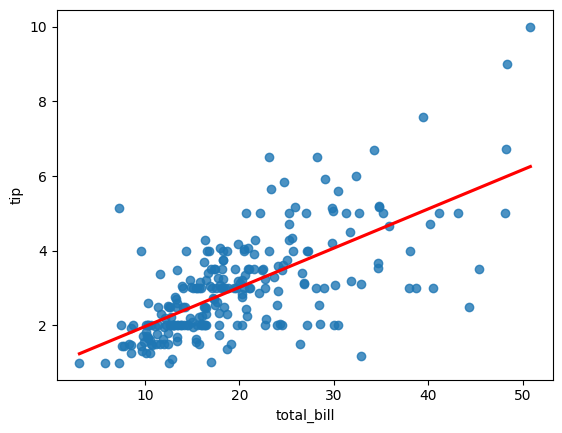

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터 : 팁스
tips = sns.load_dataset("tips")

# 모델 에시 (선형 회귀 모델)
# reg plot은 추세선을 그려주는 기능을 가지고 있습니다.
sns.regplot(x="total_bill", y="tip", data=tips, ci=None, line_kws={"color": "red"})
print()

### 학습과 추론?
- 추세선을 만들어 내면 (모델을 만들어내면), 예측을 할 수 있습니다.
- 모델을 만드는 과정을 "학습" 이라고 합니다.
- 만든 모델을 가지고 예측하는 것을 "추론" 이라고 합니다.

<br/>

- 모델이 만들어 졌으니, 위 차트를 보고 답변을 해보세요.
- 50달러치 식사를 하면, 어느정도 TIP을 받을 수 있을까? --> 정답 약 $6


### 머신러닝 정의 다시 살펴보기
- 머신러닝의 정의는 다음과 같습니다.
  - 데이터를 기반으로 최적의 모델을 계산하여 완성합니다.
  - 이를 활용해 새로운 데이터를 예측하거나 분류할 수 있게 하는 방법입니다.
- 머신러닝이 무엇인지 이해가지요?
  - 참고로 LLM에서 사용되는 신경망도 머신러닝의 일종입니다.

# 2. 선형 회귀 모델 이해하기
- 선형 회귀 모델은 피쳐(feature)의 추세선 or 추세면입니다.
  - 피쳐라고 하면 대상에서 값으로 표현하면서 모델에 입력되는 변수를 뜻합니다.
  - 사람이 대상이면 "키, 몸무게, 나이" 이런 값들이 피쳐(feature)라고 할 수 있습니다.

- 선형회귀모델을 만드는 방법을 생각해봅시다.
  - 선형회귀모델은 피쳐가 1개면 무조건 선입니다. 2개면 면 입니다.
  - 피쳐 2개는 머리가 아프니, 1개일 때만 생각해봅시다.
  - 선이면 "직선의 방정식으로 이뤄짐"에 틀림이 없습니다.  

  $\huge\hat{y} = ax + b$

- 목표는 "점들과 떨어져 있는 거리의 합이 최소"인 선을 찾아내는 것이고, a, b 값을 찾아내면 되는 것이죠.
- 실제 y 값과 예측된 y값과의 차이를 오차(Error) 라고 합니다. 아래 그림에서 세로 직선이 오차입니다.
- 각 점별로 오차의 합이 최소가 되는 직선을 찾으면, 최고의 추세선임에 틀림이 없습니다.

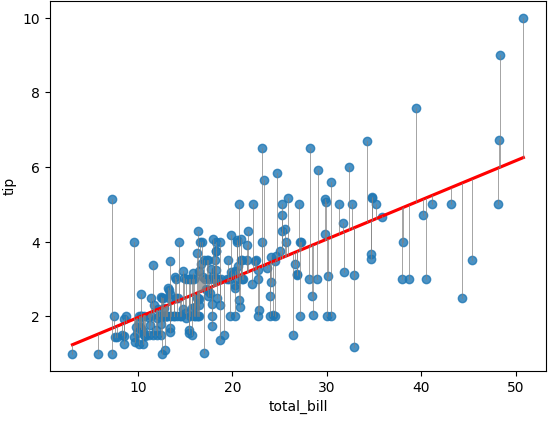

- a, b 값을 2중 for문 돌리면서 "오차의 합'이 최소가 되는 a, b 를 쉽게 찾아낼 수 있을 것 같습니다.
- 이 방법은 Grid Search라고 하는데, 실무에서 잘 쓰이지 않습니다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# 샘플 데이터 (Seaborn tips dataset)
tips = sns.load_dataset("tips")
X = tips["total_bill"].values
y = tips["tip"].values

# 검색 범위 설정
a_values = np.linspace(0, 2, 100) # 기울기(a) 후보 (0 ~ 0.5 사이 100개)
b_values = np.linspace(0, 5, 100) # 절편 후보(b) (0 ~ 5 사이 100개)

best_a, best_b = None, None
min_error = float("inf")

# 2중 for문으로 Grid Search
for a in a_values:
    for b in b_values:
        #예측하기
        y_hat = a * X + b # 직선 방정식으로 y 예측 값들 한꺼번에 계산

        error = np.sum(np.abs(y - y_hat)) # Error 계산 = 오차의 합

        if error < min_error:
            min_error = error
            best_a, best_b = a, b

print("최적 기울기 a:", best_a)
print("최적 절편 b:", best_b)
print("최소 '오차의 합':", min_error)

최적 기울기 a: 0.12121212121212122
최적 절편 b: 0.5555555555555556
최소 '오차의 합': 179.96868686868686


- 추세선을 잘 찾았는지 그려봅시다.

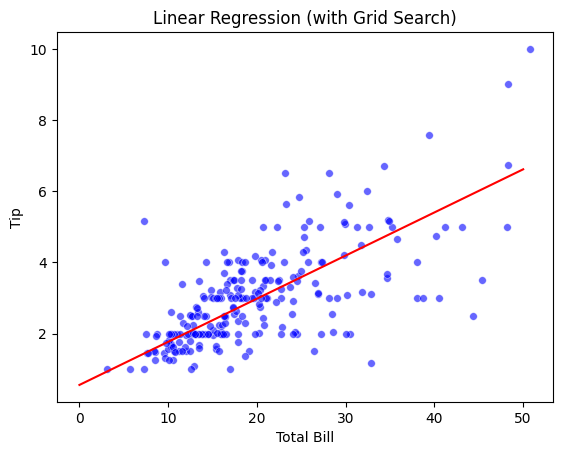

In [4]:
sns.scatterplot(x=X, y=y, s=30, color="blue", alpha=0.6)

# 우리가 찾은 회귀선 (빨간색)
x_line = np.linspace(0, 50, 100)
y_line = best_a * x_line + best_b

plt.plot(x_line, y_line, color="red")

plt.title("Linear Regression (with Grid Search)")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
print()

# 3. MAE (Mean Absolute Error)
- 방금은 오차의 합이 최소가 되는 것을 구했습니다.
- '오차의 합'을 기준으로 하면 좋은 a, b 값을 구할 순 있습니다.
- 하지만 오차의 합 값 자체는 의미가 없습니다. 데이터에 양이 많아지면 값이 커지거든요.
  - (위 데이터에서 구한 "최소오차의합"인 179.9 라는 수는 별 의미가 없는 수 입니다.)
- '오차의 평균' 은 데이터가 많던 적던, **예측 모델과 실제 값들의 차이**를 수치로 잘 설명할 수 있겠습니다.
- 평균은 np.mean( ) 함수를 사용하면 쉽게 구할 수 있습니다.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

# 샘플 데이터 (Seaborn tips dataset)
tips = sns.load_dataset("tips")
X = tips["total_bill"].values
y = tips["tip"].values

# 검색 범위 설정
a_values = np.linspace(0, 2, 100) # 기울기(a) 후보 (0 ~ 0.5 사이 100개)
b_values = np.linspace(0, 5, 100) # 절편 후보(b) (0 ~ 5 사이 100개)

best_a, best_b = None, None
min_error = float("inf")

# 2중 for문으로 Grid Search
for a in a_values:
    for b in b_values:
        #예측하기
        y_hat = a * X + b # 직선 방정식으로 y 예측 값들 한꺼번에 계산

        # error = np.sum(np.abs(y - y_hat)) # Error = 오차의 합
        error = np.mean(np.abs(y - y_hat)) # Error = 오차의 평균 <--- 이 부분이 달라졌어요!

        if error < min_error:
            min_error = error
            best_a, best_b = a, b

print("최적 기울기 a:", best_a)
print("최적 절편 b:", best_b)
print("최소 '오차의 평균':", min_error)

최적 기울기 a: 0.12121212121212122
최적 절편 b: 0.5555555555555556
최소 '오차의 평균': 0.7375765855274051


- 결과는 크게 달라지지 않지만, 여기서 구한 0.73 이라는 수치는 의미가 있습니다.
- 만든 모델이 실제 값과 얼만큼 차이가 있는지를 표현할 수 있습니다.

# 4. MSE (Mean Sequre Error)
- MAE는 오차 값에 적절히 값이 반영되는데요..
- 오차가 크게 발생하면, 아주 큰 에러가 발생했다!! 라고 강조하고 싶어졌습니다.
- 그래서 오차에 제곱을 하여, 오차 값에 크게 반응하도록 만들어봅시다.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

# 샘플 데이터 (Seaborn tips dataset)
tips = sns.load_dataset("tips")
X = tips["total_bill"].values
y = tips["tip"].values

# 검색 범위 설정
a_values = np.linspace(0, 2, 100) # 기울기(a) 후보 (0 ~ 0.5 사이 100개)
b_values = np.linspace(0, 5, 100) # 절편 후보(b) (0 ~ 5 사이 100개)

best_a, best_b = None, None
min_error = float("inf")

# 2중 for문으로 Grid Search
for a in a_values:
    for b in b_values:
        #예측하기
        y_hat = a * X + b # 직선 방정식으로 y 예측 값들 한꺼번에 계산

        # error = np.sum(np.abs(y - y_hat)) # Error = 오차의 합
        # error = np.mean(np.abs(y - y_hat)) # Error = 오차의 평균 (MAE)
        error = np.mean(np.abs(y - y_hat) ** 2) # Error = 오차 제곱의 평균 (MSE) <--- 이 부분이 달라졌어요!

        if error < min_error:
            min_error = error
            best_a, best_b = a, b

print("최적 기울기 a:", best_a)
print("최적 절편 b:", best_b)
print("최소 '오차 제곱의 평균':", min_error)

최적 기울기 a: 0.10101010101010102
최적 절편 b: 1.0101010101010102
최소 '오차 제곱의 평균': 1.0373996209821346


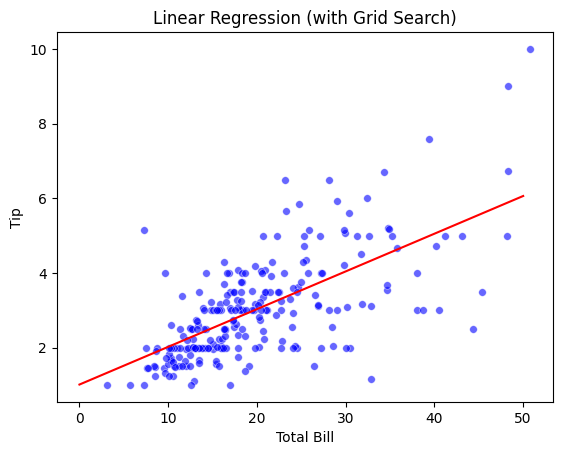

In [7]:
sns.scatterplot(x=X, y=y, s=30, color="blue", alpha=0.6)

# 우리가 찾은 회귀선 (빨간색)
x_line = np.linspace(0, 50, 100)
y_line = best_a * x_line + best_b

plt.plot(x_line, y_line, color="red")

plt.title("Linear Regression (with Grid Search)")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
print()

- 잘 됩니다~.
- 머신러닝 학자들은 **MSE**와 **Cross Entropy**를 가장 흔하게 사용합니다.  
*(Cross Entropy는 다음에 나와요! 일단은 MSE 를 꼭 기억해주세요.)*

# Grid Search 보다... 더 나은 방법은 없을까?
- 지금까지 우리는 최적의 `a`, `b` 값을 찾기 위해 Grid Search 방법을 사용했습니다.
- Grid Search는 `a`, `b` 값의 범위를 직접 지정해야 하고, 모든 조합을 다 시도해보므로 매우 비효율적입니다.
- 수학자들은 MSE가 최소가 되는 최적의 `a`, `b` 값을 한 번의 수식으로 바로 계산할 방법을 찾아냈습니다.  
이것이 바로 **정규방정식(Normal Equation)** 입니다.


# 5. 정규방정식
정규방정식을 이해하려면, 먼저 우리가 풀고 싶은 문제를 행렬(Matrix)로 표현해야 합니다.

- 우리의 목표: 모든 데이터에 대해 예측값($\hat{y} = ax + b$)과 실제값($y$)의 오차(MSE)를 최소화하는 `a`와 `b` 찾기
- 이를 수식으로 표현하면 아래와 같이 여러 개의 방정식을 동시에 풀어야 하는 문제가 됩니다.
  $$
  \begin{cases}
   y_1 \approx ax_1 + b \\
   y_2 \approx ax_2 + b \\
   \vdots
  \end{cases}
  $$
이를 아래과 같이 행렬로 표현할 수 있습니다.

  $$
  \begin{bmatrix} y_1 \\ y_2 \\ \vdots \end{bmatrix}
  \approx
  \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \end{bmatrix}
  \begin{bmatrix} a \\ b \end{bmatrix}
  $$

- 이 연립방정식은 행렬을 사용하면 아래와 같은 하나의 식으로 간단하게 표현할 수 있습니다.
$$ y \approx X\theta,\quad\quad\quad\theta = \begin{bmatrix} a \\ b \end{bmatrix} $$
  - $y$: 실제값 벡터 (Target Vector)
  - $X$: 입력 피쳐 행렬 (Feature Matrix)
  - $\theta$: 우리가 찾으려는 가중치 벡터 (`a`와 `b`) (Weight Vector)

<br>

### 역행렬 문제
- 우리는 $\theta$를 구하고 싶으므로, 양변에 $X$의 역행렬($X^{-1}$)을 곱하면 될 것처럼 보입니다. ($\theta = X^{-1}y$)
- **하지만 대부분의 데이터 행렬 $X$는 행과 열의 개수가 다른 직사각 행렬이므로, 역행렬을 구할 수 없습니다.**  
(지금 역행렬이 무엇인진 모르겠지만 행과 열의 개수가 같은 정사각 행렬에만 구할 수 있습니다.)

<br>

### 정규방정식: 똑똑한 해결책
- 이 문제를 해결하기 위해, 위 수식($X\theta = y$)의 양변에 $X$의 **전치행렬($X^T$)** 을 곱해줍니다.
  $$ X^T X \theta = X^T y $$
- 이렇게 하면 $X^T X$는 항상 정사각 행렬이 됩니다! 이제 역행렬을 구할 수 있게 되었습니다.
- 마지막으로 $(X^T X)$의 역행렬을 양변에 곱해주면 우리가 원하는 $\theta$를 구할 수 있습니다.
<br/>

이것이 바로 **정규방정식**입니다.  
(위의 계산 도출 과정 대해 이해할 필요 전-혀 없습니다! 하단 결과식만 보시면 됩니다)
<br/><br/><br/>
$$\huge \theta = (X^T X)^{-1} X^T y $$

$\huge A^{-1}$을 역행렬 이라고 하고, numpy에서는 `np.linalg.inv(A)` 로 계산합니다.

$\huge B^{T}$을 전치행렬(Transpose) 라고 하고, numpy에서는 `B.T` 로 계산합니다.


In [8]:
import numpy as np
import seaborn as sns

# 데이터 불러오기
tips = sns.load_dataset("tips")
X = tips["total_bill"].values.reshape(-1,1) # 세로로 긴 행렬 (n,1) 형태로 변경
Y = tips["tip"].values.reshape(-1,1) # 세로로 긴 행렬인 (n,1) 형태로 변경

# X 행렬에 앞에 [1] 추가
X_b = np.c_[np.ones((X.shape[0], 1)), X]   # [[1, x1], [1, x2], [1, x3]....]

# 정규방정식 계산: [b, a] = (X^T·X)^(-1)·X^T·Y
b, a = np.linalg.inv(X_b.T @ X_b) @ (X_b.T) @ (Y)

print("절편 b:", b)
print("기울기 a:", a)

절편 b: [0.92026961]
기울기 a: [0.10502452]


- Grid Search보다 MSE값이 작게 나오는 최고의 a, b 값을 한방에 계산했습니다.

In [9]:
y_hat = a * X + b

# MSE 계산
mse = np.mean((Y - y_hat) ** 2)
print("MSE:", mse)

MSE: 1.036019442011377


- 정규방정식으로 구한 a, b 값으로 선형회귀 모델을 그려보았습니다.

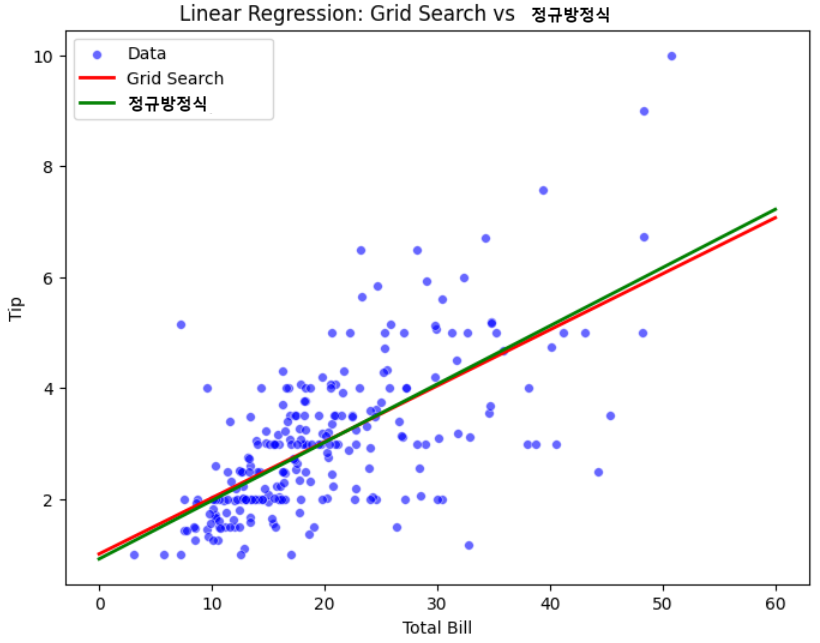

# 6. 정규방정식의 단점
- 아까 이거 기억나실까요? 역행렬이라고 했던 것.. 역행렬이 뭔지 설명은 안드렸지만, 아래 기호는 기억이 나실겁니다.  
$\huge A^{-1}$
- 정규방정식에는 역행렬이 들어가는데, 이 역행렬을 계산하는데 되게 느립니다.
- 역행렬을 구할 수 없을 때도 있습니다.
- 피쳐가 늘어날수록 연산이 불가능 할정도로 연산량과 메모리 사용량이 많습니다.

- 역행렬 구하기 힘들고, 구할 수 없을 때도 있어서, 유사 역행렬을 사용하는 SVD 라는 기법이 있습니다
- 그런데 이 SVD는 역행렬 문제는 해결할 수있지만, 피쳐가 늘어날 수록 메모리 사용량 계산이 역시 힘듦니다.
- 그래서 **Gradient Descent** 방법을 사용합니다.
- Gradient Descent가 가장 중요합니다. 머신러닝 전반적으로, 특히 신경망에서도 가장 널리 쓰이는 방법입니다.


# 7. 경사하강법 (Gradient Descent, GD)
- 먼저 아래 그래프를 이해해봅시다. (y축 : 손실함수 값, x축 : 파라미터)

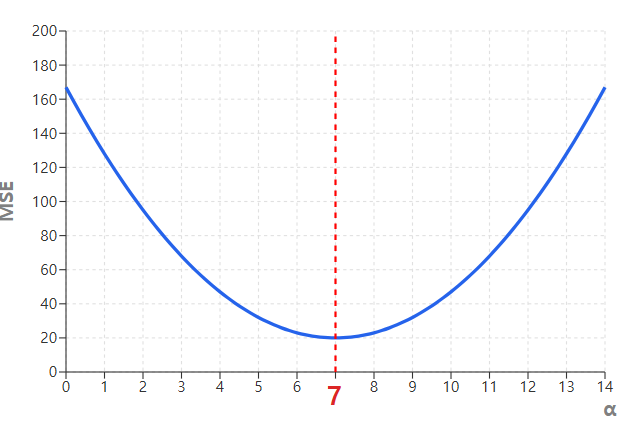

- a 값이 7이 될때 MSE가 최솟값이 됩니다.
- 전체 데이터를 이용하여 수식을 이용하면 a가 7일때 최솟값이라는 것을 알수있지만 (정규방정식)
- 우리의 목적은 **전체 데이터를 확인하지 않고, 최소한의 데이터만 살펴보는 방법**으로 a = 7일때 최솟값인 것을 찾아야합니다.

- 먼저 랜덤한 곳을 택합니다.

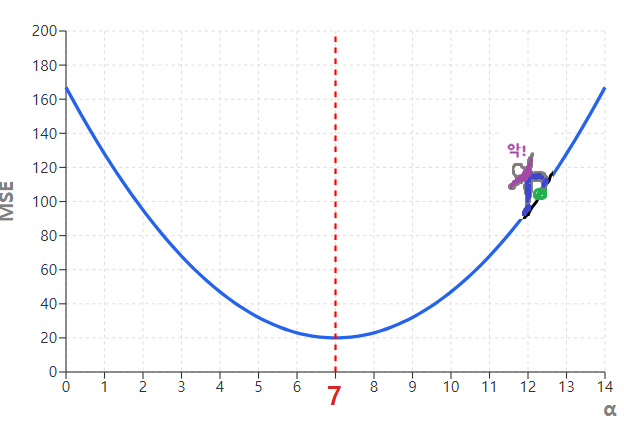

- 랜덤한 지점을 한곳을 선택합니다. (위 그림 참고)
- 바닥의 기울기는 미분을 하면 구할 수 있는데, 아무래도 왼쪽으로 점프하면 가장 낮은 곳으로 하강할 수 있을 듯 합니다.
- 왼쪽으로 적당히 점프합시다.

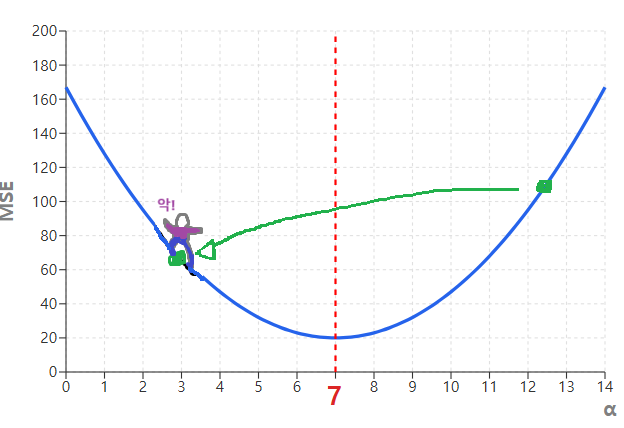

- 도착 지점의 미분값을 구해보니, 기울기가 오른쪽으로 내려가면 될듯 합니다.
- 다시 점프를 해봅시다.

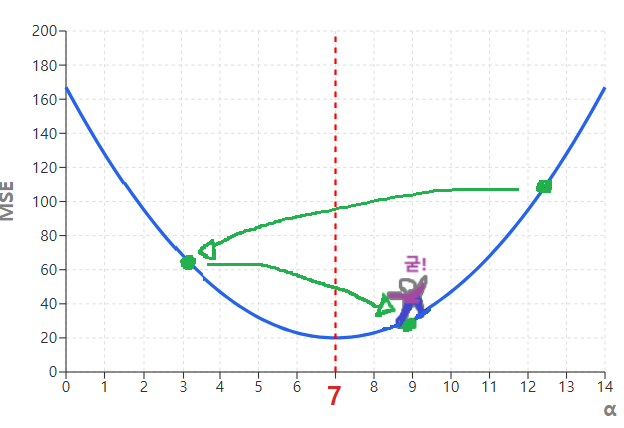

- 위와 같이 반복하면 적은 횟수로, MSE가 작은 좋은 a 값을 찾을 수 있습니다.
- 모델은 반드시 주어지는 데이터에서 MSE가 최소가 되는 값일 필요가 없습니다.
- 처음 보는 데이터에도 잘 동작되기 위해서는 적절히 MSE가 적은 값이 필요하거든요. (실험치)
- 이제 코드를 살펴보겠습니다.

Epoch 0, MSE=38.2277, a=-0.0215, b=0.3950
Epoch 100, MSE=1.0797, a=0.1265, b=0.4099
Epoch 200, MSE=1.0783, a=0.1261, b=0.4184
Epoch 300, MSE=1.0769, a=0.1258, b=0.4267
Epoch 400, MSE=1.0756, a=0.1254, b=0.4349
Epoch 500, MSE=1.0743, a=0.1251, b=0.4430
Epoch 600, MSE=1.0730, a=0.1248, b=0.4509
Epoch 700, MSE=1.0718, a=0.1244, b=0.4587
Epoch 800, MSE=1.0706, a=0.1241, b=0.4664
Epoch 900, MSE=1.0695, a=0.1238, b=0.4739



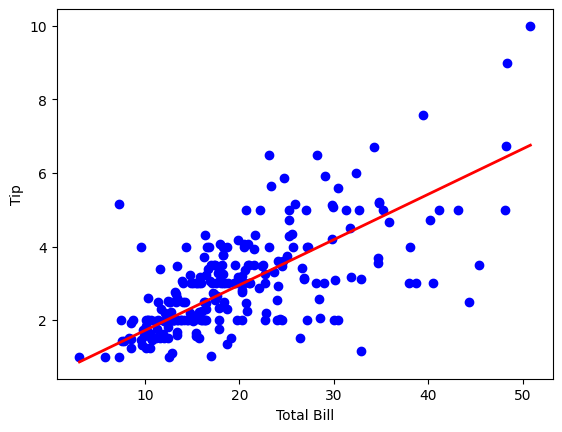

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 샘플 데이터 (Seaborn tips dataset)
tips = sns.load_dataset("tips")
X = tips["total_bill"].values
y = tips["tip"].values

# 파라미터 초기화 (a: 기울기, b: 절편)
a = np.random.randn()
b = np.random.randn()

# 하이퍼파라미터 (하드코딩하는 값을 하이퍼파라미터라고 합니다.)
lr = 0.001 # 학습률 (점프 거리 조율)
epochs = 1000 # 몇 번 반복 학습할지 (점프 횟수 조율)

# Gradient Descent 학습 (Batch Gradient Descent 라고 합니다.)
for epoch in range(epochs):
    # 모든 데이터에 대한 예측
    y_hat = a * X + b

    # 오차
    error = y_hat - y

    # MSE 수식을 미분하고 난 뒤, 수식을 정리한 결과 (수식 정리는 생략)
    # 여기서 기울기를 계산함
    grad_a = np.mean(error * X)
    grad_b = np.mean(error)

    # 파라미터 업데이트 (한 에폭에 단 1번, 점프!!)
    a -= lr * grad_a
    b -= lr * grad_b

    # 학습 상황 출력
    if epoch % 100 == 0:
        mse = np.mean((y - y_hat)**2)
        print(f"Epoch {epoch}, MSE={mse:.4f}, a={a:.4f}, b={b:.4f}")


# 학습된 직선 그리기
plt.scatter(X, y, color="blue", label="Data")
x_line = np.linspace(X.min(), X.max(), 100)
y_line = a * x_line + b
plt.plot(x_line, y_line, color="red", linewidth=2, label="Batch GD Line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
print()

# 8. 더 똑똑한 경사 하강법 : 아담(Adam)
- 기존에는 학습률(lr) 만큼 무지성 점프를 했습니다.
- 이런 문제가 발생하기도 합니다.
- 좋은 a, b 를 못 찾고 학습이 안되는 것이죠. 이걸 **지역 최소점(Local Minimum)** 에 갇혔다고 표현합니다.

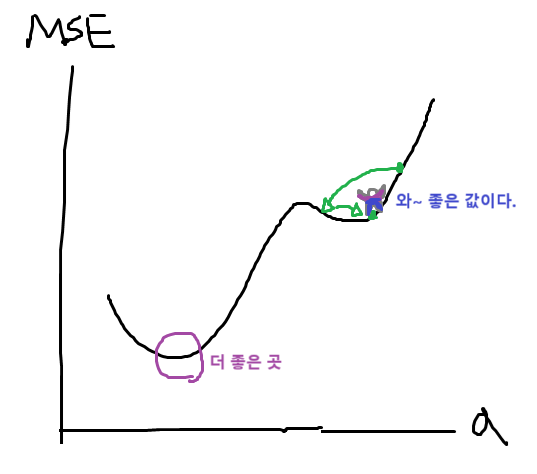


- 그래서 더 똑똑한 점프가 필요했습니다. 바로 "아담"이라는 경사하강법입니다

<br/>

- 똑똑한 점프하는 아이디어 (아담 아이디어)
  - 이전 점프 방향과 동일한 방향으로 점프 몇번 더 해본다.(관성 적용)
  - 이전 점프와 방향과 동일한 방향이었다면 좀 더 크게 점프 해본다.
  - 왔다 갔다하는 부분은 점프거리를 조금씩 줄여본다. (학습률 조율)

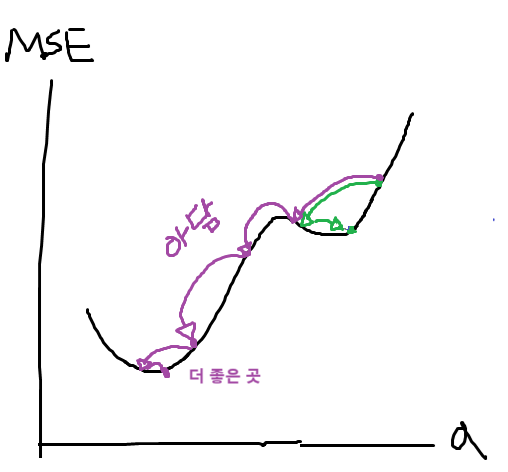

- 신경망에서는 기본 GD 보다는 GD의 업그레이드인 Adam을 더 많이 씁니다!
- 정확한 용어는 **Adam Optimizer** 라고 합니다. 수식과 구현은 과감히 생략합니다!!

# 9. 선형 회귀 (Linear Regression) 정리
- 드디어 선형 회귀가 끝났습니다.
- 선형 회귀 모델은 추세선 수식을 만드는 것으로 기억해주세요.
- 수식이 만들어지면, 새로운 값에 대해 예측할수 있죠. 이걸 머신러닝이라고 합니다.
- 선형 회귀 모델을 만드는 방법은 크게 두 가지 입니다.
  - 정규방정식
    - 한방에 뽱 하고 y = ax + b의 a, b 값을 계산합니다. MSE가 최소인 값을 한방에 계산합니다.
    - 단점은 계산량이 많아서, 피쳐가 많으면 계산이 안됩니다.
  - Gradient Decent (경사 하강법)
    - MSE가 최소인 곳을 점프 점프 하면서 찾아갑니다.
    - 계산량이 적어 피쳐가 많아도 빠르게 y = ax + b 의 a, b 값을 찾아낼수 있습니다.
    - Local Minimum에 빠질 수 있어서, 아담 같은 경사하강법을 씁니다.



# 10. 로지스틱 회귀(Logistic Regression) 이해하기
- 새로운 주제가 시작되었습니다. 로지스틱 회귀입니다.
- "회귀(Regression)" 이라는 단어는 수를 예측한다는 뜻입니다.
- 로지스틱 회귀는 실제로는 분류 기법입니다. 입력 값이 **두 범주 중 한 범주에 속할 확률** 을 예측하는 기법입니다.

<br/>

### 이진분류 문제의 예시
- 공부시간을 넣으면, 합격인지 아닌지 확률을 알려주는 모델
- 키워드를 넣으면, 스팸 메일인지 아닌지 확률을 알려주는 모델
- 혈압, 콜레스테롤, 몸무게, 나이, 키를 넣으면 암에 걸릴 확률을 알려주는 모델

<br/>

### 로지스틱 회귀로 완성된 모델, 이해하기
- 이번 설명에서는 **공부 시간에 따른 시험 합격 여부**를 가지고 설명합니다.
- 주어지는 데이터는 이렇습니다.
  - 2시간 공부 한 A 학생 : 불합격
  - 3시간 공부 한 B 한색 : 불합격
  - 4시간 공부 한 C 학생 : 합격
  - 3시간 공부 한 D 학생 : 불합격
  - 5시간 공부 한 E 학생 : 합격
  - 1시간 공부 한 F 학생 : 불합격
  - ... 등등 많은 데이터

- 아래 차트는 학습이 완료 되었을 때 모습입니다. 로지스틱 회귀를 위해 먼저 위 차트부터 이해할 수 있어야 합니다!
  - 어떤 큰 데이터를 학습한 결과가 아래와 같다고 가정하는 겁니다.


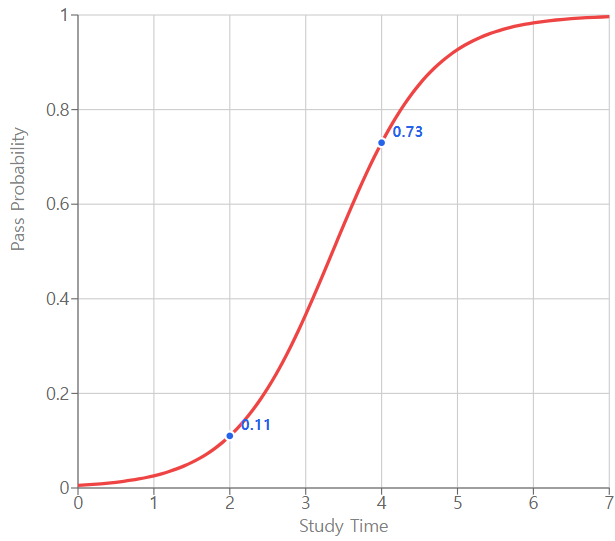

- 2 시간 공부한 학생은 합격 확률이 0.11 으로 11% 입니다.
- 4 시간 공부한 학생은 합격 확률이 0.73 으로 73% 입니다.

<br/>

- 모델이 완성되면, 공부 시간에 따라 합격과 불합격 확률을 구할 수 있겠죠.
- 이것을 **이진 분류 모델**이라고 합니다.

### 로지스틱 회귀 수식 이해하기
- 수식이 복잡하게 생겼습니다. (수식을 정확하게 이해할 필요는 없어서 다행이긴 합니다.)
- 시그모이드 함수라고 합니다.

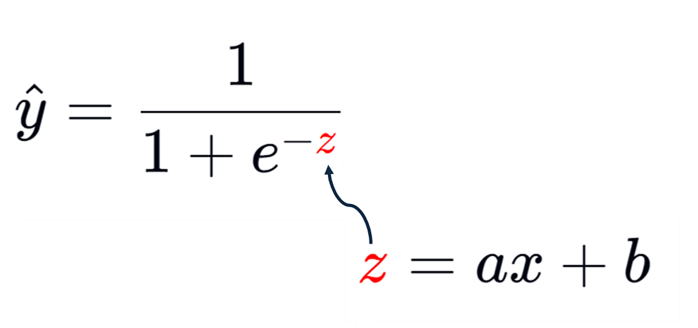

- 코드를 이해 합시다.
- 큰 데이터를 이용하여 학습이 완료되었다고 가정합니다.
  - 학습 결과 a : 1.5 라고 가정합시다.
  - 학습 결과 b : -5 라고 가정합시다.


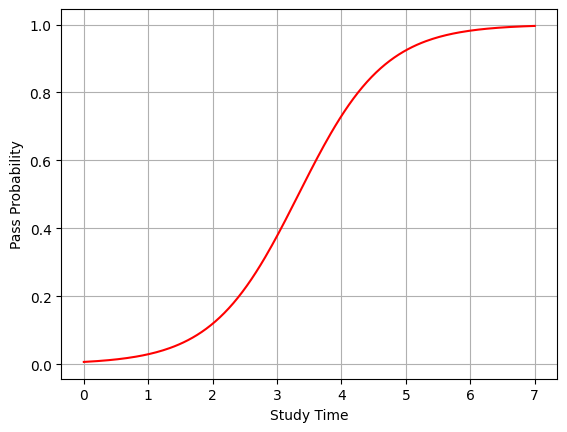

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 학습 완료된 파라미터 결과 (a, b)
a = 1.5
b = -5

# 모델을 이쁘게 그려보기 위한 X 값
X = np.linspace(0, 7, 200)

# 모델 예측 값
y_hat = sigmoid(a * X + b) # z = ax + b

plt.plot(X, y_hat, color="red")
plt.xlabel("Study Time")
plt.ylabel("Pass Probability")
plt.grid(True)
print()

### 우리가 학습을 통해 알아내야 하는 값은 바로 a, b 값입니다.
- 선형 회귀문제는 y = ax + b 에서 **a, b를 알아내서** 추세선을 만들어 내는 문제였습니다.

- 로지스틱 회귀문제는 y = sigmoid(ax + b) 에서 **a, b 를 알아내서** 확률 곡선을 만들어 내는 문제입니다

### 11. 로지스틱 회귀 문제에 Grid Search 적용하기
- 선형회귀 문제처럼 2중 for문을 돌려 최적의 a, b 값 알아봅시다.
- 2중 for문 돌려서 최적의 값을 구해보는 과정은, 완벽한 이해를 위해 필요한 과정입니다.





최적 기울기 a: 2.878787878787879
최적 절편 b: -10.0
최소 Loss값 (MSE): 0.29714936573928563



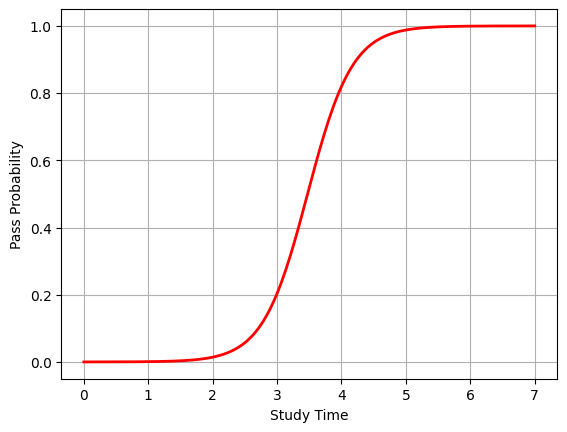

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 (X) 데이터
X = np.array([1,2,3,4,5,6,2,3,4,5,6,7,1,2,3,4,5,6,7,8,2,3,4,5,6,7,8,9,10])

# 합격 여부 (y) 데이터, 1 이면 합격, 0 이면 탈락!
y = np.array([0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1])

# 시그모이드 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 로스 함수
def get_loss(y, y_hat):
    return np.sum((y - y_hat)**2) #MSE

# 탐색 범위
a_values = np.linspace(0, 3, 100)
b_values = np.linspace(-10, 10, 100)

best_a, best_b = None, None
min_loss = float("inf")

# Grid Search
for a in a_values:
    for b in b_values:
        # X의 모든 데이터로 예측 값들 Y hat 만들기
        y_hat = sigmoid(a * X + b)

        # Error 계산
        loss = get_loss(y, y_hat)

        # Min 값 확인
        if loss < min_loss:
            min_loss = loss
            best_a, best_b = a, b

print("최적 기울기 a:", best_a)
print("최적 절편 b:", best_b)
print("최소 Loss값 (MSE):", min_loss)

# 최적 파라미터로 곡선 그리기
X_test = np.linspace(0, 7, 200)
y_prob = sigmoid(best_a * X_test + best_b)

plt.plot(X_test, y_prob, color="red", linewidth=2)
plt.xlabel("Study Time")
plt.ylabel("Pass Probability")
plt.grid(True)
print()


# 12. 크로스 엔트로피 적용하기
- Error 구하는 공식을 Loss Function 이라고 합니다.
- Loss Function으로 MSE를 써왔고 MSE 값이 최소가 되는 a, b 를 찾는게 우리의 목표였죠.

<br/>

- MSE에서 35% 라고 예측했는데 정답이 1이었다면 오차는 $(1 - 0.35)^2$ 입니다.
- MSE에서 95% 라고 예측했는데 정답이 1이었다면 오차는 $(1 - 0.95)^2$ 입니다.
- 맞췄을 때는 적게 패널티를 주고, 많이 틀렸을 때는 큰 패널티를 주기에 잘 동작은 됩니다.

<br/>

- 그런데 여기서 이상한 점이 있습니다.
- MSE를 쓰는 이유가.. 오차를 크게 확대해서 보려고 제곱하는건데요.
- 0.5를 제곱하면 0.5 보다 더 작아집니다!! ㅠㅠ (0.5 x 0.5 = 0.25)

<br/>

- 따라서 작은 오차는 적게, 큰 오차는 아주 크게 확대를 해주는 "크로스엔트로피" 라는 Loss Function을 사용합니다.
- 로지스틱회귀 처럼 분류 문제에서는 Loss Function으로 크로스엔트로피를 가장 많이 사용합니다.

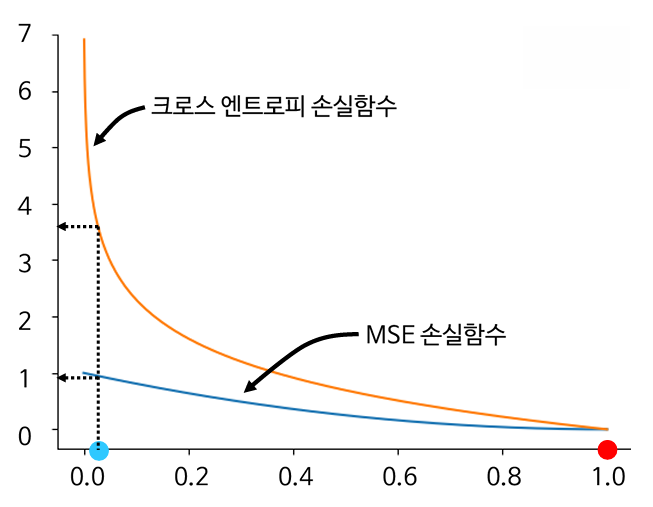

최적 기울기 a: 2.909090909090909
최적 절편 b: -10.0
최소 Loss값 (크로스엔트로피): 0.062280033955804455



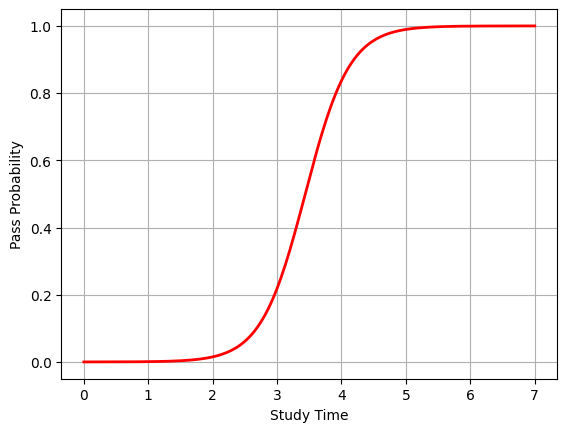

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 (X) 데이터
X = np.array([1,2,3,4,5,6,2,3,4,5,6,7,1,2,3,4,5,6,7,8,2,3,4,5,6,7,8,9,10])

# 합격 여부 (y) 데이터
y = np.array([0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1])

# 시그모이드 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 로스 함수
def get_loss(y, y_hat):
    #return np.sum((y - y_hat)**2) #MSE

    # 크로스 엔트로피 <---- 이 부분 변경됨
    eps = 1e-10
    return -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))

# 탐색 범위
a_values = np.linspace(0, 3, 100)
b_values = np.linspace(-10, 10, 100)

best_a, best_b = None, None
min_loss = float("inf")

# Grid Search
for a in a_values:
    for b in b_values:
        # 예측하기
        y_hat = sigmoid(a * X + b)

        # Error 계산
        loss = get_loss(y, y_hat)

        if loss < min_loss:
            min_loss = loss
            best_a, best_b = a, b

print("최적 기울기 a:", best_a)
print("최적 절편 b:", best_b)
print("최소 Loss값 (크로스엔트로피):", min_loss)

# 최적 파라미터로 곡선 그리기
X_test = np.linspace(0, 7, 200)
y_prob = sigmoid(best_a * X_test + best_b)

plt.plot(X_test, y_prob, color="red", linewidth=2)
plt.xlabel("Study Time")
plt.ylabel("Pass Probability")
plt.grid(True)
print()


# 13. Grid Search 대신, 로지스틱 회귀의 좋은 학습 방법
- 크로스엔트로피를 사용한 로지스틱 회귀 수식은, 정규방정식으로 한방에 빵! 정답을 구할 수 없습니다.
- Gradient Descent, 경사하강법으로 좋은 파라미터를 찾아낼수 있습니다. 물론 Adam도 쓸 수 있구요.
- 다음은 Gradient Descent 코드로 학습하는 코드입니다.

Epoch 0, Loss=0.4927, a=0.4628, b=-0.1585
Epoch 500, Loss=0.1919, a=1.1326, b=-3.5483
Epoch 1000, Loss=0.1389, a=1.5473, b=-5.1052
Epoch 1500, Loss=0.1141, a=1.8402, b=-6.1758
Epoch 2000, Loss=0.0988, a=2.0728, b=-7.0162
Epoch 2500, Loss=0.0881, a=2.2689, b=-7.7197
Epoch 3000, Loss=0.0800, a=2.4402, b=-8.3314
Epoch 3500, Loss=0.0736, a=2.5933, b=-8.8763
Epoch 4000, Loss=0.0684, a=2.7323, b=-9.3702
Epoch 4500, Loss=0.0639, a=2.8602, b=-9.8235

최적 기울기 a: 2.9786155185218623
최적 절편 b: -10.242717697389347
최종 Loss: 0.060115360098514155



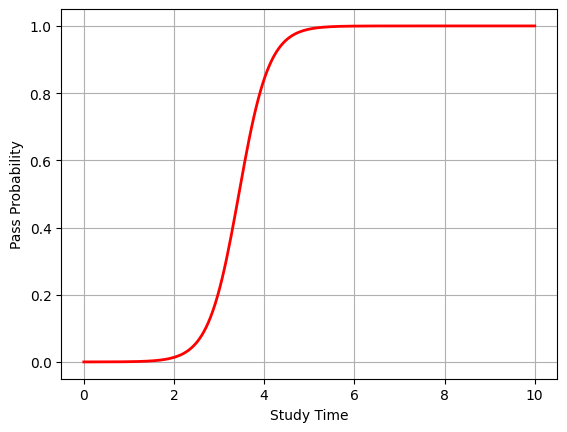

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 (X), 합격 여부 (y)
X = np.array([1,2,3,4,5,6,2,3,4,5,6,7,1,2,3,4,5,6,7,8,2,3,4,5,6,7,8,9,10])
y = np.array([0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 하이퍼 파라미터 초기화
lr = 0.1  # 학습률
epochs = 5000

# a, b 초기값 세팅
np.random.seed(42)  # 재현성 고정
a = np.random.randn()  # 기울기
b = np.random.randn()  # 절편

# Gradient Descent
for epoch in range(epochs):
    # 예측
    y_hat = sigmoid(a * X + b)

    # Loss (Cross Entropy)
    eps = 1e-10
    loss = -np.mean(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))

    # 기울기 계산
    error = y_hat - y
    grad_a = np.mean(error * X)
    grad_b = np.mean(error)

    # 파라미터 업데이트 (점프!)
    a -= lr * grad_a
    b -= lr * grad_b

    # Loss값 출력
    if epoch % 500 == 0:
      print(f"Epoch {epoch}, Loss={loss:.4f}, a={a:.4f}, b={b:.4f}")

# 학습 결과
print()
print("최적 기울기 a:", a)
print("최적 절편 b:", b)
print("최종 Loss:", loss)

# 시각화
X_test = np.linspace(0, 10, 200)
y_prob = sigmoid(a * X_test + b)

plt.plot(X_test, y_prob, color="red", linewidth=2)
plt.xlabel("Study Time")
plt.ylabel("Pass Probability")
plt.grid(True)
print()


# 14. 끝으로
- 고생 많으셨습니다. 여러분은 드디어 머신러닝의 시작점인 '선형회귀' / '로지스틱회귀'를 이해하셨습니다.
- 이 지식은 앞으로 신경망을 배울 때 기반 지식이 될 것입니다.
- 아시겠지만, AI 학습 내용은 총 3개로 분류될 수 있습니다.

### Easy 자료 (강사님 자료)
- AI를 처음 공부하는 분들을 위해 만들어져있습니다.
- 내용을 모두 이해해야합니다! **강사님의 도움을 적극적으로 받아주세요.**

### 실습 / 과제 자료 (업스테이지 자료)
- AI를 공부해본 경험자 위주로 만들어져있습니다.
- 퍼즐조각을 모은다는 생각으로 공부해주세요!. **GPT의 도움을 적극적으로 받아주세요.**

### 교수님 강의
- 국내 최고의 AI 교수님들의 강의가 시작됩니다.
- 최대한 내용을 이해해봅시다.